**линейный классификатор на TensorFlow**

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.1


## генерируем данные

In [3]:
from sklearn.datasets import make_blobs

n_samples = 100 # количество примеров
n_fetch = 2 # размерность пространства признаков
# n_out = 1 # размерность выхода модели 

X,y = make_blobs( 
        n_samples=n_samples,
        centers=n_fetch,  
        random_state=461,
        cluster_std=[1.0, 1.1,],
       )

X = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
y = y.reshape([-1,1])

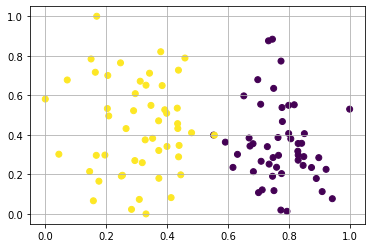

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid()

## строим модель

линейный классификатор
$$ a(x) = \sum_i x_i w_i +b $$

In [5]:
# параметры модели
W = tf.Variable(np.random.rand(n_fetch,1),dtype=tf.float32)
b = tf.Variable(np.random.rand(1),dtype=tf.float32)

# линейный классификатор
model = lambda x: tf.matmul(x,W)+b

## функция потери

$$ MSQE(o,y) = \frac{1}{m}\sum_{i=1}^n (o_i-y_i)^2 $$

In [6]:
# функция потери MSQE
loss = lambda real_y, pred_y: tf.reduce_mean( tf.square(real_y - pred_y) )

## обучаем модель

In [7]:
# пакуем данные в формат TF
X_train = tf.cast(X,tf.float32)
y_train = tf.cast(y.reshape([-1,1]),tf.float32)

In [8]:
# реализуем метод градиентного спуска

learning_rate = .05 # коэффициент скорости обучения
training_epochs = 300 # количество эпох обучения
loss_history = []  # история измениения ф-ции потери

# метод оптимизации (способ изменения весов)
optimizer = tf.optimizers.SGD(learning_rate)

In [9]:
# шаг процесса оптимизации 
def fit_step(x,y):
    
    # считаем значение градиента ф-ции потери
    with tf.GradientTape(persistent=True) as tape: loss_value = loss(y,model(x))
    W_gradients, b_gradients = tape.gradient(loss_value,(W,b))

    # изменияем веса
    optimizer.apply_gradients([ [ W_gradients, W ], [ b_gradients, b ], ])

    # обновляем историю значений ф-ции потери 
    loss_history.append(loss_value.numpy())

In [10]:
# основной цикл обучения
for _ in range(training_epochs):
    fit_step(X_train, y_train)

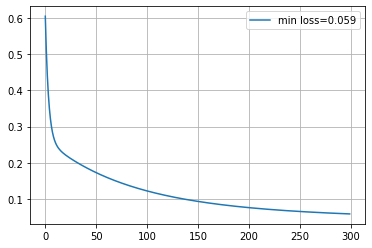

In [11]:
# история изменения значений ф-ции потери
plt.plot(loss_history,label='min loss=%.3f'%(min(loss_history)))
plt.grid()
plt.legend()

## тестируем результат

In [12]:
# проверяем результат
s = model(X_train).numpy() 
p = (s>.5).astype(np.int8)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y,p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



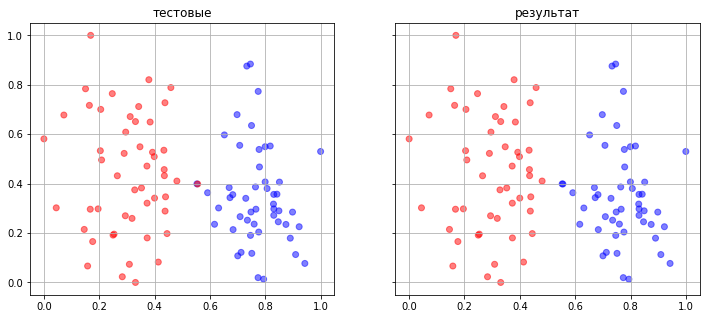

In [14]:
# результат классификации
def plot_data(ax,X,y,t):
    c = [ ['b','r','g','y'][j] for j in y.flatten()  ]
    ax.set_title(t)
    ax.scatter( x=X[:,0], y=X[:,1], c=c,  alpha=0.5 )
    ax.grid()

    
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X,y,'тестовые')    
plot_data(ax1,X,p,'результат')    
plt.show() 